## Trabalho Prático 1 - Aprendizado de Máquinas          
#### Aluno: Mauricio de Oliveira
#### Professor: Adriano Veloso
#### Departamento de Ciência da Computação - Universidade Federal de Minas Gerais

### RESUMO

#### Este trabalho prático requer treinar uma rede neural utilizando o algoritmo de _backpropagation_ para atualizar os pesos da rede empregando diferentes algoritmos para cálculo do gradiente. Além disso, a fórmula usada para calcular o erro é a expressão conhecida como _log-loss_ e a função para se obter não lineridade será a sigmoid.
#### A rede neural deve ser treinada para classificar corretamente os dígitos de uma parte da base de dados MNIST. Para mais detalhes sobre essa base, [clique aqui](https://en.wikipedia.org/wiki/MNIST_database).
#### Com isso, a rede possuirá 10 unidades na camada de saída, cada uma correspondendo a um dos dígitos (0-9), como na figura baixo.

![NN](nn.jpeg "Neural Network")


### DETALHES 
#### Como dito, devemos minimizar o erro indicado pela função _log-loss_ que se encontra abaixo. Nela, temos que m = tamanho do set, K = número de unidades na camada de saída, y<sub>k</sub><sup>i</sup> é a saída da unidade k da instância i do dataset, e h<sub>o</sub>(x<sup>(i)</sup>)<sub>k</sub> é o valor calculado pela hipótese para essa instância.

![Fómula para cálculo da perda ou erro. No nosso caso, K = 10](log-loss.jpg "Log-loss")

#### O erro, claro, é calculado apenas na camada de saída (em cada uma das K = 10 unidades) e pode ser interpretado da seguinte maneira: se a saída da unidade em questão for 1 (y<sub>k</sub><sup>i</sup> = 1), o erro será dado pelo log do valor encontrado pela hipótese naquele exemplo de treino (note que a segunda parte é zerada). O erro será pequeno se h<sub>o</sub>(x<sup>(i)</sup>)<sub>k</sub> -> 1, pois log(1) é zero e será elevado quanto mais perto de 0 for h<sub>o</sub>(x<sup>(i)</sup>)<sub>k</sub> (lembrando que a sigmoid retorna valores entre 0 e 1). O raciocínio é análogo se y<sub>k</sub><sup>i</sup> = 0. 

#### O algoritmo de _backpropagation_ fornece um método para propagar o erro "para trás". Assim, o erro é passado para camadas anteriores de maneira que seja possível recalcular os pesos que ligam cada uma das camadas. Para que a atualização dos pesos esteja na direção certa, isto é, levará a minimização do erro, é utilizado gradientes.
#### Neste trabalho, 4 diferentes gradientes serão utilizados:

1. Gradient Descent: o gradiente é calculado após cada época.
2. Stochastic Gradient Descent: o gradiente é calculado após cada entrada. 
3. Mini-Batch Gradient Descent: o gradiente é calculado após 10 entradas.
4. Mini-Batch Gradient Descent: o gradiente é calculado após 50 entradas.

### ESPECIFICAÇÕES

#### Analisando algumas bibliotecas em Python, decidiu-se pela *sklearn* e mais especificamente a implementação *MLPerceptron*.
#### Iniciamente o nome "perceptron" casou estranhamento, pois para muitos ele se refere ao algoritmo da década de 50, como visto em sala de aula. No entanto, o algoritmo MLPerceptron é também conhecido como "Vanilla Neural Networks" na qual os dados são passados "para frente" da camada de entrada até a saída, e o treino utiliza o algoritmo de *backpropagation*.
#### Conferindo a documentação desse pacote conclui-se que o mesmo cumpre todos os requisitos deste projeto. Links da documentação: [docs](http://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html) [docs](http://scikit-learn.org/stable/modules/neural_networks_supervised.html)

#### A seguir é mostrado que todas as demandas do projeto são realmente cumpridas com este pacote mostrando os parâmetros que podem ser controlados para tal. As demandas desse projeto são:

1. Função sigmoid: basta fazer activation = 'logistic'
2. Log-loss function: é a função utilizada para calcular o erro [como mostrado aqui](http://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html)
3. K saídas na camada de saída: basta fazer com que cada y<sup>i</sup> tenha tamanho 10, ou seja, se y<sup>i</sup> = 4, fazer y<sup>i</sup> = [0, 0, 0, 1, 0, 0, 0, 0, 0, 0]
4. Variar tamanho da camada oculta: variar parâmetro hidden_layer_sizes
5. Gradient Descent: fazer solver = 'sgd' e batch_size = m (*)
6. Stochastic Gradient Descent: fazer solver = 'sgd' e batch_size = 1 (*)
7. Mini-Batch Gradient Descent: fazer solver = 'sgd' e rodar batch_size = 10 e batch_size = 50 (*)
8. Variar taxa de aprendizado: fazer learning_rate = 'constant' e variar learning_rate_init.
9. Gŕaficos de convergência do erro empírico: atributo loss_curve_ depois que o treino foi completado.

(*) Um outro parâmetro importante é "shuffle". Ele é booleano e caso seja verdadeiro, é sempre feito o embaralhamento da entrada antes de calcular o erro. Ele foi setado como falso para ficar idêntico ao algoritmo da sala de aula, aonde se embaralha os dados apenas uma vez.

#### Maiores detalhes sobre este módulo estarão presentes a seguir, com a implementação.

### IMPLEMENTAÇÃO

#### Primeiro, os imports necessários (numpy, matplotlib, sklearn, etc.). Além do helper utils que se encontra nesse diretório.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import genfromtxt
from utils import Y_dict, params
from sklearn.neural_network import MLPClassifier
from sklearn.utils import shuffle
from timeit import default_timer as timer

#### <font color='blue'>- Lendo a entrada</font>

In [2]:
data = genfromtxt('data_tp1', delimiter=',') 

#### <font color='blue'>- Criando X e Y </font>
#### Normaliza X (divide todas entradas por 255 - valor máximo). Não é necessariamente uma _feature scaling_ pois apenas comprime o intervalo (0,255) para (0,1). Como sabemos o cálculo do gradiente é bem sensível a intervalos de variáveis muito distintos. Existe diversos escaladores que poderiam ser empregados aqui, mas decidiu-se por apenas dividir os pixels por 255.

In [3]:
X = data[:,1:]/255 # X 
Y = data[:,0]      # Y

#### <font color='blue'>- Visualizando algumas entradas </font>

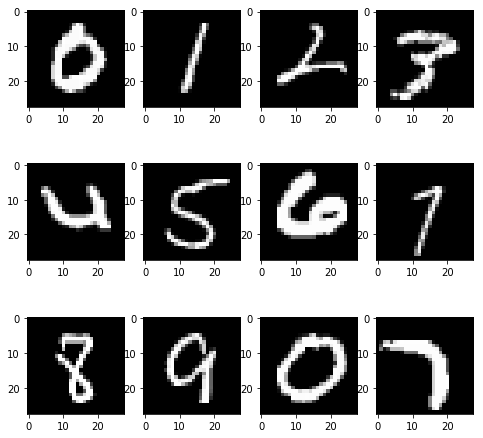

0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 7


In [4]:
fig = plt.figure(figsize=(8, 8))
idx = [3, 2, 43, 464, 916, 1460, 2801, 3213, 3216, 3404, 3584, 3585] # número da linha 
for i in range(1, len(idx) + 1):
    fig.add_subplot(3, 4, i)
    plt.imshow(X[idx[i-1]].reshape((28,28)), cmap="gray")
plt.show()
print(', '.join(str(int(Y[j])) for j in idx)) # confere 

#### Na rede neural, será fornecida como entrada todos os 784 pixels de cada imagem como entrada. Ou seja, a camada de entrada consistirá de 784 unidades, que passaram para a camada oculta de tamanhos 25, 50, e 100.
#### Antes disso, veremos mais _insights_ sobre os dados de entrada. Nesse caso, sobre a distribuição dos 5000 exemplos.

<Container object of 10 artists>

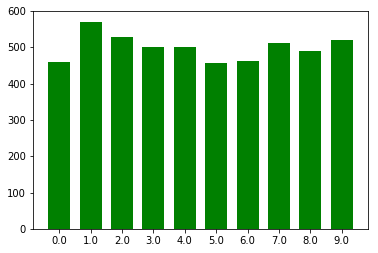

In [5]:
classes = [0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0]
class_count = []

for clss in classes: class_count.append(np.count_nonzero(Y == clss))

plt.bar(classes, class_count, width = 0.7, tick_label = classes, align = "center", color = "g")

#### É possivel verificar com este histograma que existe um distribuição boa de ocorrências de cada um dos números (0-9). Isso é bom para o treino.

#### <font color='blue'>- Criando as classes  </font>

#### Até o momento, cada valor de Y é um número de 0 a 9. Como necessitamos de criar classes, converteremos cada instância de Y para um np.array de tamanho 10. No script utils.py está presente um dicionário que será usado para essa conversão. Lembrando que posteriormente a módulo MLPClassifier criará automaticamente 10 unidades na saída uma vez que este é o tamanho de cada y.

In [6]:
Y_dict # declarado em utils.py

{0.0: array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0]),
 1.0: array([0, 1, 0, 0, 0, 0, 0, 0, 0, 0]),
 2.0: array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0]),
 3.0: array([0, 0, 0, 1, 0, 0, 0, 0, 0, 0]),
 4.0: array([0, 0, 0, 0, 1, 0, 0, 0, 0, 0]),
 5.0: array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0]),
 6.0: array([0, 0, 0, 0, 0, 0, 1, 0, 0, 0]),
 7.0: array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0]),
 8.0: array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0]),
 9.0: array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1])}

In [7]:
X_train = X                                # X_train
Y_train = np.array([Y_dict[y] for y in Y]) # Y_train é o Y agora com classes

In [8]:
print(Y[0])
print(Y_train[0])
print(Y[100])
print(Y_train[100])
print(Y[300])
print(Y_train[300])
print(Y[500])
print(Y_train[500])

7.0
[0 0 0 0 0 0 0 1 0 0]
6.0
[0 0 0 0 0 0 1 0 0 0]
4.0
[0 0 0 0 1 0 0 0 0 0]
3.0
[0 0 0 1 0 0 0 0 0 0]


#### Acima é mostrado com 4 exemplos como fica agora cada y. Agora estamos prontos para realizar o treino.

#### <font color='blue'> - Pré treino </font>
#### Pela especificação, estamos interessados apenas no desempenho do treino no próprio training set e não na generalização do modelo. Com isso, o dataset não será dividido em training e test set. Apenas o que será feito antes é "embaralhar" X_train e Y_train (aproveitando o Y também - saída sem classes) pelo menos uma vez. 

In [9]:
X_train, Y_train, Y = shuffle(X_train, Y_train, Y)

#### Verificando o shuffle

0.0
[1 0 0 0 0 0 0 0 0 0]
3.0
[0 0 0 1 0 0 0 0 0 0]
2.0
[0 0 1 0 0 0 0 0 0 0]
0.0
[1 0 0 0 0 0 0 0 0 0]


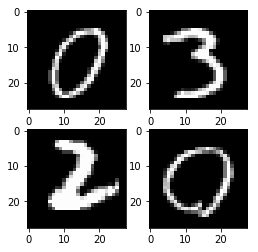

In [10]:
fig = plt.figure(figsize=(4, 4))
idx = [0, 100, 300, 500] # número da linha 
for i in range(1, len(idx) + 1):
    fig.add_subplot(2, 2, i)
    plt.imshow(X_train[idx[i-1]].reshape((28,28)), cmap="gray")
    print(Y[idx[i-1]])
    print(Y_train[idx[i-1]])
plt.show()


#### Tudo nos conformes.
#### Agora sim, o treino.

#### <font color='blue'> - Realizando o treino </font>

#### Em utils.py temos um dicionário com todos os parâmetros para cada rodada.

In [11]:
params

{'GD_100_0.5': {'activation': 'logistic',
  'alpha': 0,
  'batch_size': 5000,
  'beta_1': 0.9,
  'beta_2': 0.999,
  'early_stopping': False,
  'epsilon': 1e-08,
  'hidden_layer_sizes': (100,),
  'learning_rate': 'constant',
  'learning_rate_init': 0.5,
  'max_iter': 10000,
  'momentum': 0,
  'nesterovs_momentum': False,
  'power_t': 0.5,
  'random_state': None,
  'shuffle': False,
  'solver': 'sgd',
  'tol': 0.0001,
  'validation_fraction': 0.1,
  'verbose': False,
  'warm_start': False},
 'GD_100_1': {'activation': 'logistic',
  'alpha': 0,
  'batch_size': 5000,
  'beta_1': 0.9,
  'beta_2': 0.999,
  'early_stopping': False,
  'epsilon': 1e-08,
  'hidden_layer_sizes': (100,),
  'learning_rate': 'constant',
  'learning_rate_init': 1,
  'max_iter': 10000,
  'momentum': 0,
  'nesterovs_momentum': False,
  'power_t': 0.5,
  'random_state': None,
  'shuffle': False,
  'solver': 'sgd',
  'tol': 0.0001,
  'validation_fraction': 0.1,
  'verbose': False,
  'warm_start': False},
 'GD_100_10': {'

#### Cada chave de param corresponde a uma combinação de parâmetros que devemos fazer.
#### Primeiro temos GD, SGD e MBGD que corresponde a gradient descent, stochastic gradient descent e mini batch gradient descent.
#### Em seguida, é o tamanho da camada oculta: 25, 50, 100.
#### Depois, o valor da taxa de aprendizado usado no gradiente: 0.5, 1, 10.
#### Por último, no caso de MBGD, existe mais uma combinação: o tamanho do batch (10 ou 50).
#### Exemplos:

In [12]:
params["MBGD_50_1_50"] # camada oculta de tamanho 50, learning rate = 1 e batch_size = 50

{'activation': 'logistic',
 'alpha': 0,
 'batch_size': 50,
 'beta_1': 0.9,
 'beta_2': 0.999,
 'early_stopping': False,
 'epsilon': 1e-08,
 'hidden_layer_sizes': (50,),
 'learning_rate': 'constant',
 'learning_rate_init': 1,
 'max_iter': 10000,
 'momentum': 0,
 'nesterovs_momentum': False,
 'power_t': 0.5,
 'random_state': None,
 'shuffle': False,
 'solver': 'sgd',
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': False,
 'warm_start': False}

In [13]:
params["SGD_25_10"]  # camada oculta de tamanho 25, learning rate = 10. Note que o batch_size nesse caso é sempre 1
                     # Caso fosse "GD_25_10" o batch size seria 5000.

{'activation': 'logistic',
 'alpha': 0,
 'batch_size': 1,
 'beta_1': 0.9,
 'beta_2': 0.999,
 'early_stopping': False,
 'epsilon': 1e-08,
 'hidden_layer_sizes': (25,),
 'learning_rate': 'constant',
 'learning_rate_init': 10,
 'max_iter': 10000,
 'momentum': 0,
 'nesterovs_momentum': False,
 'power_t': 0.5,
 'random_state': None,
 'shuffle': False,
 'solver': 'sgd',
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': False,
 'warm_start': False}

#### Nos casos acima, temos diversos parâmetros. A tolerância (tol) é setada para 0.0001, o que significa que caso o erro não melhore mais que 0.0001 por duas iterações seguidas, considera-se que houve a convergência do gradiente. O treino também para caso exceda o parâmetro max_iter. Além disso, fez-se alpha = 0, pois não foi especificado usar regularização (alpha é o parâmetro de penalidade da regularização). Otimizadores como o Nesterov também foi setado para falso, simplesmente porque não foi dado em sala. No final das contas, esses parâmetros implementam exatamente o que precisamos.

In [14]:
# dicionários para armazenar informações.

running_times       = {} 
trained_networks    = {}

#### Treinando as várias redes neurais
#### Printa também o tempo (em segundos) para cada treino, além da precisão no train set.

In [15]:
for param in params:
    
    start = timer()
    ann = MLPClassifier(**params[param]).fit(X_train, Y_train)
    end = timer()
    
    running_times[param] = end - start
    trained_networks[param] = ann
    
    print(param + " finished.")
    print(running_times[param])
    print(ann.score(X_train, Y_train))

GD_25_0.5 finished.
65.81759339199925
0.9452
GD_50_0.5 finished.
90.5684948979997
0.959
GD_100_0.5 finished.
141.8238474639984
0.963
GD_25_1 finished.
53.396084410000185
0.9726
GD_50_1 finished.
71.11580052799945
0.9826
GD_100_1 finished.
100.68487748500047
0.9852
GD_25_10 finished.
0.2682078180005192
0.0
GD_50_10 finished.
0.30046098200000415
0.0
GD_100_10 finished.
0.2611710620003578
0.0
SGD_25_0.5 finished.
26.287942251999993
0.8688
SGD_50_0.5 finished.
50.402185932000066
0.896
SGD_100_0.5 finished.
168.06239872699916
0.966
SGD_25_1 finished.
19.979637824999372
0.7818
SGD_50_1 finished.
13.671396748999541
0.6338
SGD_100_1 finished.
16.62785724100104
0.516
SGD_25_10 finished.
5.960260380999898
0.1
SGD_50_10 finished.
8.987813859001108
0.0924
SGD_100_10 finished.
16.597277545999532
0.1206
MBGD_25_0.5_10 finished.
17.85950402799972
1.0
MBGD_50_0.5_10 finished.
18.946505276000607
1.0
MBGD_100_0.5_10 finished.
32.30770146500072
1.0
MBGD_25_1_10 finished.
15.012484838000091
1.0
MBGD_50_1_

#### Em trained_networks temos todas as redes treinadas. Usaremos esse dicionário para criar as curvas de convergência do erro empírico.

### APRESENTAÇÃO DOS RESULTADOS E DISCUSSÃO



In [16]:
trained_networks 

{'GD_100_0.5': MLPClassifier(activation='logistic', alpha=0, batch_size=5000, beta_1=0.9,
        beta_2=0.999, early_stopping=False, epsilon=1e-08,
        hidden_layer_sizes=(100,), learning_rate='constant',
        learning_rate_init=0.5, max_iter=10000, momentum=0,
        nesterovs_momentum=False, power_t=0.5, random_state=None,
        shuffle=False, solver='sgd', tol=0.0001, validation_fraction=0.1,
        verbose=False, warm_start=False),
 'GD_100_1': MLPClassifier(activation='logistic', alpha=0, batch_size=5000, beta_1=0.9,
        beta_2=0.999, early_stopping=False, epsilon=1e-08,
        hidden_layer_sizes=(100,), learning_rate='constant',
        learning_rate_init=1, max_iter=10000, momentum=0,
        nesterovs_momentum=False, power_t=0.5, random_state=None,
        shuffle=False, solver='sgd', tol=0.0001, validation_fraction=0.1,
        verbose=False, warm_start=False),
 'GD_100_10': MLPClassifier(activation='logistic', alpha=0, batch_size=5000, beta_1=0.9,
        bet

#### Exemplo

0.963
0.17564252650908582


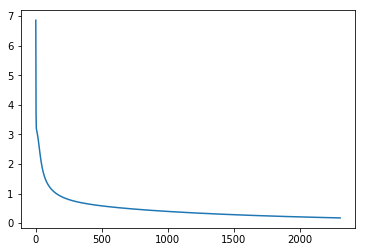

In [22]:
# Plotando a curva de erro no treino que utilizou gradient descent, 100 unidades na camada oculta, 
# e taxa de aprendizado igual a 0.5. Além disso, verificamos a precisão no dataset do treino 
# e a perda após o treino.

plt.plot(trained_networks["GD_100_0.5"].loss_curve_)
print(trained_networks["GD_100_0.5"].score(X_train, Y_train))
print(trained_networks["GD_100_0.5"].loss_)

#### Agora, vamos plotar todas as curvas obtidas.

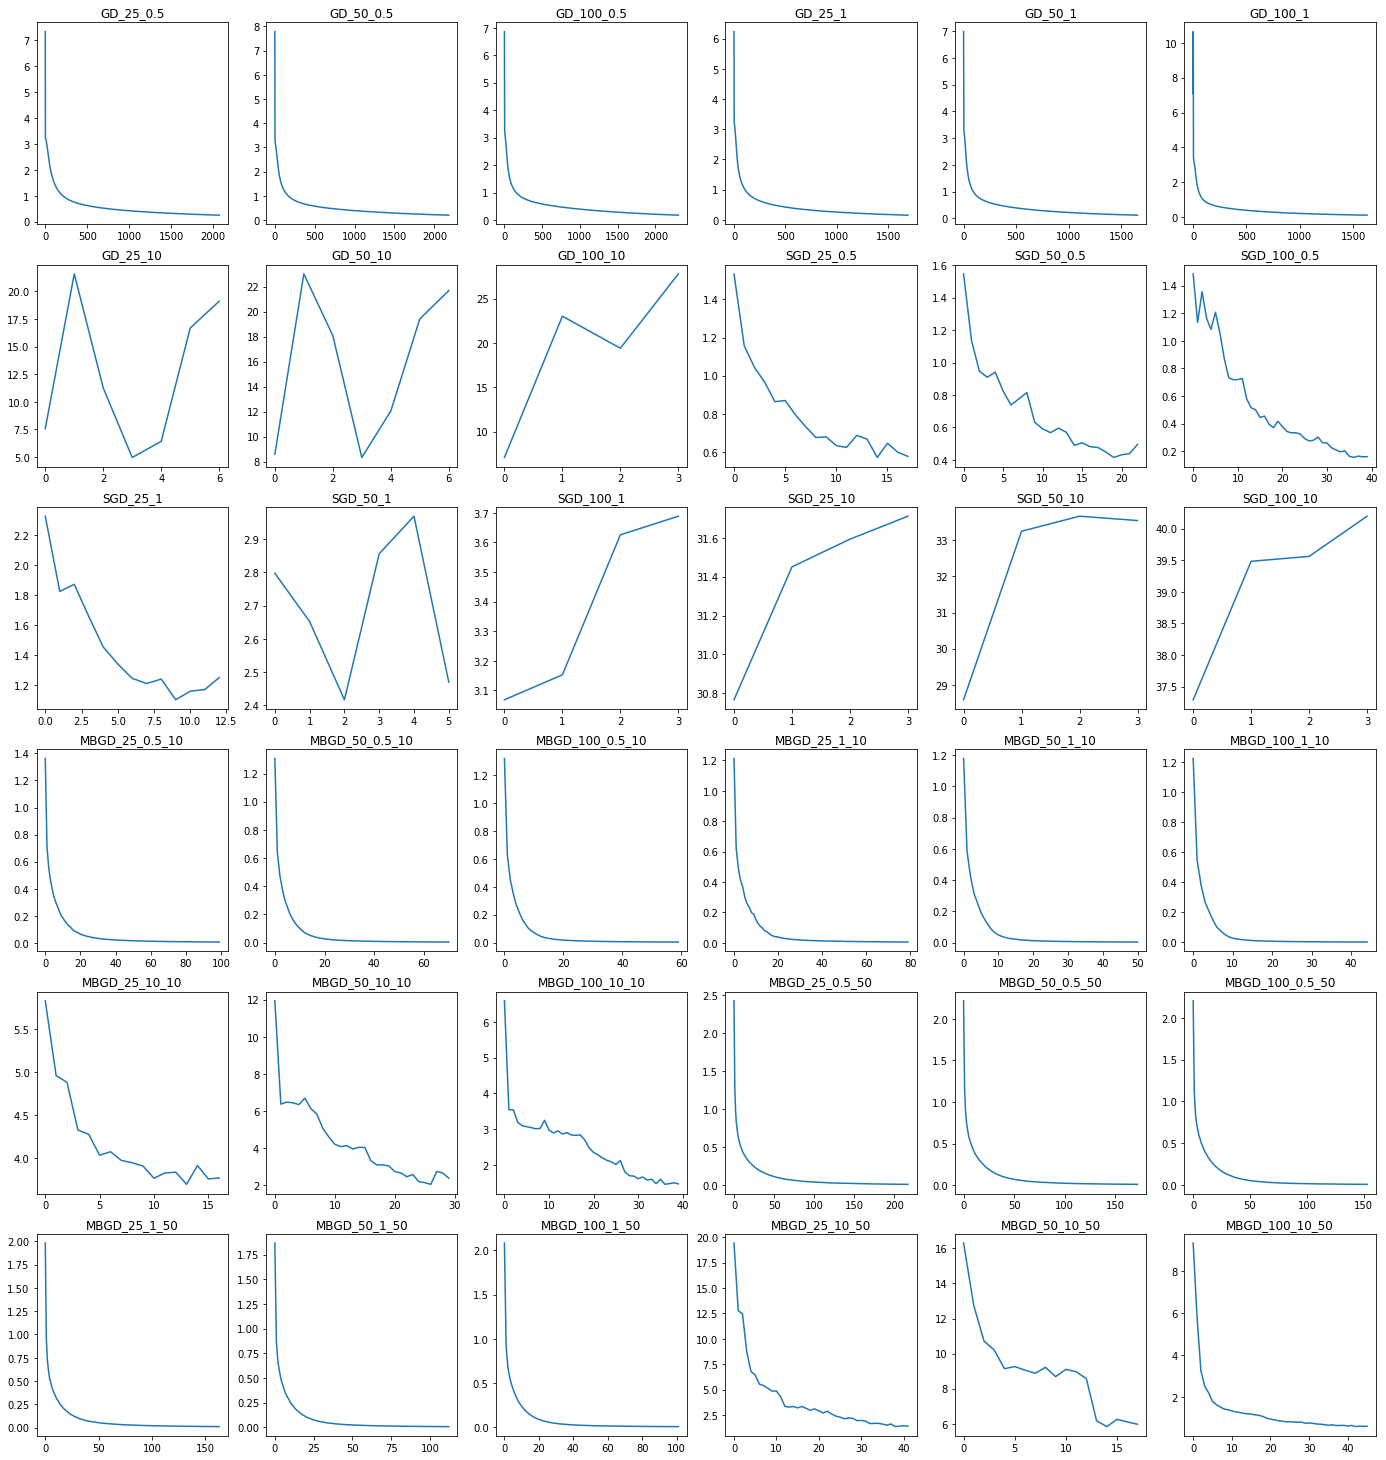

In [51]:
fig = plt.figure(figsize=(24, 26))
k   = 1
for param in params:
    fig.add_subplot(6, 6, k)
    plt.plot(trained_networks[param].loss_curve_)
    plt.title(param)
    k+=1
plt.show()

#### <font color='blue'>- Discussão geral dos resultados (taxa de aprendiza, tamanho da camada oculta, algoritmo de gradiente/tamanho do batch, etc.)</font>

#### De um modo geral, as 36 curvas acima podem ser categorizadas em duas: as que convergem e as que não.
#### As curvas que não convergem ou até mesmo divergem são: GD_25_10, GD_50_10, GD_100_10, SGD_50_1, SGD_100_1, SGD_25_10, SGD_50_10, SGD_50_10. Note que a maioria das curvas que não convergem possuem taxa de aprendizado igual a 10 (6 das 8). Sendo assim, essa taxa de aprendizado pode ser considerada alta, o que impede convergência, como demonstrado na figura abaixo.

![High learning rate](high_learning_rate.png)

#### No entanto, devemos investigar as seguintes curvas: SGD_50_1, SGD_100_1
#### Nelas, o treino foi feito utilizando stochastic gradient descent, com a camada oculta de tamanhos 50 e 100, e taxa de aprendizado 1.
#### Vamos ver se rodando o treino novamente algo pode mudar.


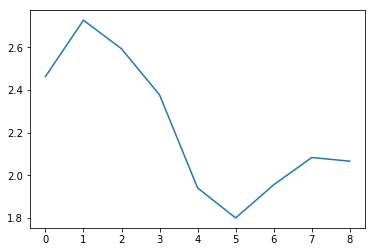

In [54]:
new_params = params
new_params["SGD_50_1"]["random_state"] = 10 # seta um seed qualquer.
sgd_50_1 = MLPClassifier(**new_params["SGD_50_1"]).fit(X_train, Y_train)
plt.plot(sgd_50_1.loss_curve_)

#### Concluí-se que não melhora muito. Atinge o mínimo na quinta iteração e após isso aumenta, até que o algoritmo considera que não irá convergir.
#### O motivo principal disso é que o cálculo do SGD realmente é mais ruidoso e sensível a outros parâmetros então como taxa de aprendizado 1 fica mais difícil de convergir. 
#### Para tentar melhorar essa curva, diversas abordagens podem ser feitas. Por exemplo, regularização, shuffle, etc. No entanto, essa análise não será feita aqui e consideraremos apenas tamanho do batch, taxa de aprendizado e tamanho da camada oculta: caso learning_rate_init = 0.5, o desempenho já seria satisfatório (curva SGD_50_0.5). Mesma coisa para batch_size = 10 (MBGD_50_1_10) e pelo visto, um modelo mais simples conseguiria acomodar melhor a taxa de aprendizado igual a 1 (SGD_25_1).

#### Voltando aos 36 plots, dentro das curvas que convergem, podemos considerar duas categorias: as com "ruído" e as "sem ruído".
#### As ruidosas: SGD_25_0.5, SGD_50_0.5, SGD_100_0.5, SGD_25_1, MBGD_25_10_10, MBGD_50_10_10, MBGD_100_10_10, MBGD_25_10_50, MBGD_50_10_50.
#### As não ruidosas/smooth: o restante.
#### As com bastante ruído em boa parte dos casos possuem taxa de aprendizado 10 (MBGD_25_10_10, MBGD_50_10_10, MBGD_100_10_10, MBGD_25_10_50, MBGD_50_10_50). O restante diz a respeito ao SGD.
#### Note que SGD_100_0.5 embora seja consideravelmente ruidosa, ela tem um desempenho muito bom. Ou seja, ter bastante ruído não necessariamente indicativo de baixa acurácia.
#### Vamos comparar as seguintes curvas e modelos: SGD_100_0.5, GD_100_0.5, MBGD_100_0.5_10, MBGD_100_0.5_50.

In [57]:
for param in ['SGD_100_0.5', 'GD_100_0.5', 'MBGD_100_0.5_10', 'MBGD_100_0.5_50']:
    print(param)
    print("Tempo de execução do treino: " + str(running_times[param]))
    print("Perda após treino: " + str(trained_networks[param].loss_))
    print("Precisão no training set: " + str(trained_networks[param].score(X_train,Y_train))) 

SGD_100_0.5
Tempo de execução do treino: 168.06239872699916
Perda após treino: 0.1596122158223631
Precisão no training set: 0.966
GD_100_0.5
Tempo de execução do treino: 141.8238474639984
Perda após treino: 0.17564252650908582
Precisão no training set: 0.963
MBGD_100_0.5_10
Tempo de execução do treino: 32.30770146500072
Perda após treino: 0.003807706138721099
Precisão no training set: 1.0
MBGD_100_0.5_50
Tempo de execução do treino: 25.712343787001373
Perda após treino: 0.008691179198724114
Precisão no training set: 1.0


#### Aqui vemos que alguns modelos dão fit perfeito ao training set (MBGD's) e o restante possui desempenhos bastante elevados. Isso está de acordo com o material que diz que o mini-batch pode convergir mais rápido que o stochastic, que embora faça menos somatórios por iteração, pode levar mais tempo para convergir utilizando a mesma regra de parada. Isso mostra também que nem sempre mais dados melhoram um modelo, por exemplo, ao apresentar 50 exemplos de cada vez, o algoritmo convergiu e teve desempenho melhor do que ao apresentar sempre os 5000. Isso provavelmente se deve aos somatórios do gradiente, que serão maiores ao apresentar para a rede todo o training set, assim os primeiros erros em GD serão muito maiores do que os primeiros errors em MBGD. Com isso, o treino levará mais tempo e atingirá a convergência um pouco antes e a perda total será um pouco maior.

In [64]:
# perda média das primeiras 10 iterações

print(sum(trained_networks['GD_100_0.5'].loss_curve_[0:9])/10) 
print(sum(trained_networks['MBGD_100_0.5_10'].loss_curve_[0:9])/10)

3.479378849678336
0.3651781288574703


#### Por último, vamos discutir o efeito variação do número de camadas nos algoritmos de cálculo de gradiente e no modelo.

#### <font color='blue'>- Discussão da variação do número de camadas</font>


#### De maneira geral, o aumento do número de unidades na camada oculta torna o modelo mais complexo, portanto mais caro computacionalmente (tempo de execução maior) e também fornece algum ganho. No entanto, em certos casos ele pode ajudar a convergir mais rápido e em outros, piora o modelo.

In [82]:
# Comparando o número de camadas. Mesmo algoritmo de gradiente.

for param in ['GD_25_0.5', 'GD_50_0.5', 'GD_100_0.5']:
    print(param)
    print("Tempo de execução do treino: " + str(running_times[param]))
    print("Perda após treino: " + str(trained_networks[param].loss_))
    print("Precisão no training set: " + str(trained_networks[param].score(X_train,Y_train))) 
    
for param in ['SGD_25_0.5', 'SGD_50_0.5', 'SGD_100_0.5']:
    print(param)
    print("Tempo de execução do treino: " + str(running_times[param]))
    print("Perda após treino: " + str(trained_networks[param].loss_))
    print("Precisão no training set: " + str(trained_networks[param].score(X_train,Y_train))) 

GD_25_0.5
Tempo de execução do treino: 65.81759339199925
Perda após treino: 0.25260897918358055
Precisão no training set: 0.9452
GD_50_0.5
Tempo de execução do treino: 90.5684948979997
Perda após treino: 0.20071115216518562
Precisão no training set: 0.959
GD_100_0.5
Tempo de execução do treino: 141.8238474639984
Perda após treino: 0.17564252650908582
Precisão no training set: 0.963
SGD_25_0.5
Tempo de execução do treino: 26.287942251999993
Perda após treino: 0.5766849481407024
Precisão no training set: 0.8688
SGD_50_0.5
Tempo de execução do treino: 50.402185932000066
Perda após treino: 0.4956009361609621
Precisão no training set: 0.896
SGD_100_0.5
Tempo de execução do treino: 168.06239872699916
Perda após treino: 0.1596122158223631
Precisão no training set: 0.966


#### Em [documentação - complexidade](http://scikitlearn.org/stable/modules/neural_networks_supervised.html#complexity), temos a complexidade de treino do modelo de acordo com alguns parâmetros, um deles sendo a quantidade de camadas e unidades em cada uma. Sendo assim, não surpreendente que nesse casos, o aumento do tamanho da camada oculta melhora um pouco a precisão mas aumenta significativamente o tempo de execução. Em alguns casos, não parece valer a pena aumentar a quantidade de unidades na camada oculta, o ganho é pouco e se perde consideravelmente em tempo computacional.


In [83]:
for param in ['SGD_25_1', 'SGD_50_1', 'SGD_100_1']:
    print(param)
    print("Tempo de execução do treino: " + str(running_times[param]))
    print("Perda após treino: " + str(trained_networks[param].loss_))
    print("Precisão no training set: " + str(trained_networks[param].score(X_train,Y_train))) 

SGD_25_1
Tempo de execução do treino: 19.979637824999372
Perda após treino: 1.2520937480352343
Precisão no training set: 0.7818
SGD_50_1
Tempo de execução do treino: 13.671396748999541
Perda após treino: 2.470276727994509
Precisão no training set: 0.6338
SGD_100_1
Tempo de execução do treino: 16.62785724100104
Perda após treino: 3.688348894759598
Precisão no training set: 0.516


#### A taxa de aprendizado igual 1, no algoritmo SGD, a medida que o modelo fica mais complexo (tamanho da camada oculta aumenta) ele piora a precisão. Note que não há grande diferença no tempo de execução devido a regra de convergência.

In [88]:
for param in ['MBGD_25_1_10', 'MBGD_50_1_10', 'MBGD_100_1_10']:
    print(param)
    print("Tempo de execução do treino: " + str(running_times[param]))
    print("Perda após treino: " + str(trained_networks[param].loss_))
    print("Precisão no training set: " + str(trained_networks[param].score(X_train,Y_train))) 

MBGD_25_1_10
Tempo de execução do treino: 15.012484838000091
Perda após treino: 0.0056026532337252076
Precisão no training set: 1.0
MBGD_50_1_10
Tempo de execução do treino: 14.17336144499859
Perda após treino: 0.0034703550379082512
Precisão no training set: 1.0
MBGD_100_1_10
Tempo de execução do treino: 23.29906632699931
Perda após treino: 0.0029455183100187883
Precisão no training set: 1.0


#### Neste último caso, temos uma situação em que o aumento do tamanho da camada oculta (de 25 para 50) fez com que o treino levasse menos tempo. 

### FIM

#### Obrigado!